In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [25]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.rand(200, 1)  # here add some random noise

# the below equ. is use to generate a dataset
# y = 0.8x^2 + 0.9x + 2

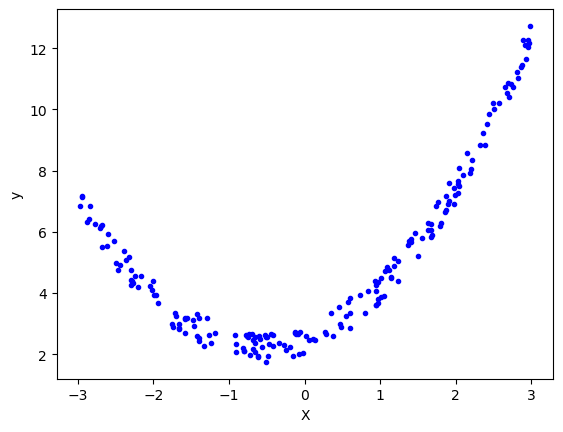

In [26]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

***Applying Linear regression***

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.41828086134014186

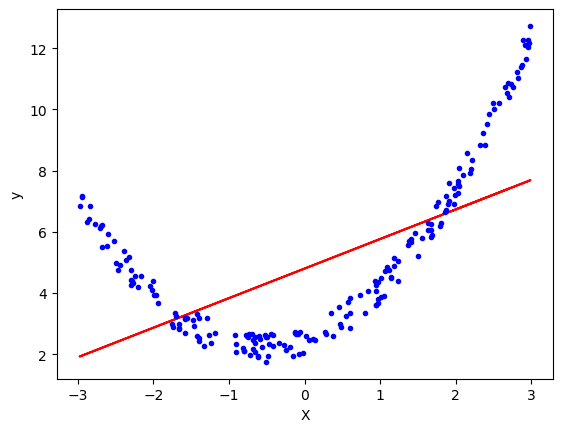

In [31]:
plt.plot(X_train, lr.predict(X_train), color='red')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

***Applying Ploynomial Regression***

In [32]:
# Degree 2
ploy = PolynomialFeatures(degree=2)
X_train_trans = ploy.fit_transform(X_train)
X_test_trans = ploy.transform(X_test)

In [33]:
print(X_train[0])
print(X_test_trans[0])

[2.69059686]
[1.         2.35704014 5.55563824]


In [34]:
# include_bias parameter

In [35]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [36]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test, y_pred)

0.9883871151912937

In [39]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.87359994 0.79557701]]
[2.52135887]


In [54]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = ploy.transform(X_new)
y_new = lr.predict(X_new_poly)

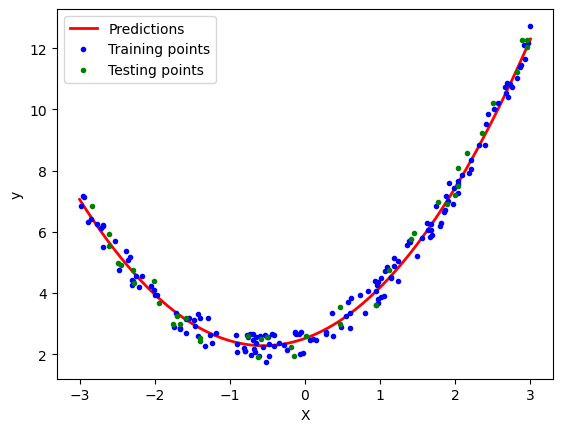

In [59]:
plt.plot(X_new,y_new,"r-",linewidth=2, label='Predictions')
plt.plot(X_train,y_train,"b.", label='Training points')
plt.plot(X_test,y_test,"g.", label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()